In [2]:
import import_ipynb
import LoadData

importing Jupyter notebook from LoadData.ipynb


In [3]:
import DataPreparation

importing Jupyter notebook from DataPreparation.ipynb


In [4]:
import pickle
file = open('flowdata.pickle', 'rb')
data  = pickle.load(file)
file.close()
# print("File= "+str(file))
# print("Data= "+str(data))
print("Data[2]= "+str(data[1]))

Data[2]= [0 0 0 ... 1 1 1]


In [5]:
Xdata = data[0]
Ydata =  data[1]
XdataT = data[2]
YdataT = data[3]
# print("XdataT= "+str(XdataT))

In [6]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

In [7]:
DataPreparation.Prepare(Xdata,Ydata,XdataT,YdataT)

<Prepare(Thread-6, initial)>

In [8]:
clf = DecisionTreeClassifier()
clf.fit(Xdata,Ydata)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
Prediction1=clf.predict(XdataT)
Score = clf.score(XdataT,YdataT)
m=Score*100
print("The Score of DecisionTree Classcifier is ", Score*100)

The Score of DecisionTree Classcifier is  99.90000999900009


In [9]:
print("XdataT="+str(XdataT))

XdataT=[[3.4400000e-04 1.0000000e+00 5.1255000e+04 ... 2.0000000e+00
  3.0100000e+02 2.1905070e+06]
 [3.4200000e-04 1.0000000e+00 5.1255000e+04 ... 2.0000000e+00
  2.1100000e+02 2.1905070e+06]
 [1.0462961e+01 0.0000000e+00 3.3258000e+04 ... 2.1000000e+01
  5.7310000e+03 2.1634100e+05]
 ...
 [0.0000000e+00 0.0000000e+00 2.4060000e+03 ... 1.0000000e+00
  6.2000000e+01 6.8710000e+04]
 [0.0000000e+00 0.0000000e+00 2.4070000e+03 ... 1.0000000e+00
  6.2000000e+01 6.8710000e+04]
 [0.0000000e+00 0.0000000e+00 2.4090000e+03 ... 1.0000000e+00
  6.2000000e+01 6.8710000e+04]]


In [81]:
from sklearn import neighbors
cls=neighbors.KNeighborsClassifier()

In [84]:
cls.fit(Xdata,Ydata)
pre1=cls.predict(XdataT)
i=cls.score(XdataT,YdataT)
print("The Score of KNearest Neighbour Classcifier is "+str(i*100)+"%")
res=str(i*100)

The Score of KNearest Neighbour Classcifier is 62.72372762723728%


In [27]:
from sklearn.naive_bayes import *
cls=GaussianNB()
cls.fit(Xdata,Ydata)
Prediction = cls.predict(XdataT)
score = cls.score(XdataT,YdataT)
p3=score*100
print("The Score of Gaussian Naive Bayes model Classcifier is "+str(score*100)+"%")

The Score of Gaussian Naive Bayes model Classcifier is 62.72372762723728%


In [17]:
from sklearn.ensemble import VotingClassifier
model1=DecisionTreeClassifier(random_state=1)
model2=GaussianNB()
model3=KNeighborsClassifier()
model = VotingClassifier(estimators=[('Gaussian Naive Bayes',model2),('KNN',model3)], voting='hard')
model.fit(Xdata,Ydata)


VotingClassifier(estimators=[('Gaussian Naive Bayes',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'))],
                 flatten_transform=True, n_jobs=None, voting='hard',
                 weights=None)

In [64]:
r=model.score(XdataT,YdataT)
r1=r*100
print("The Score of Ensemble Classifier= "+str(r*100)+"%")

The Score of Ensemble Classifier= 99.96000399960005%


In [10]:
from sklearn.ensemble import VotingClassifier
model1=DecisionTreeClassifier(random_state=1)
model2=GaussianNB()
model3=KNeighborsClassifier()
model = VotingClassifier(estimators=[('Gaussian Naive Bayes',model2),('KNN',model3)], voting='soft')
model.fit(Xdata,Ydata)
r=model.score(XdataT,YdataT)
r1=r*100
print("The Score of Ensemble Classifier= "+str(r*100)+"%")

The Score of Ensemble Classifier= 99.85001499850014%


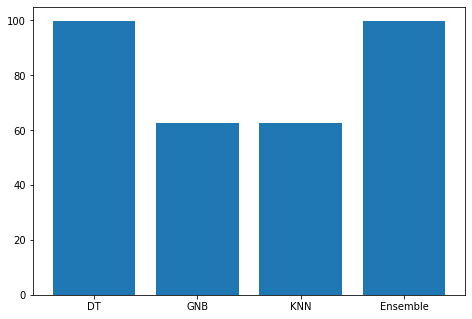

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['DT', 'GNB', 'KNN', 'Ensemble']
results = [99.90000999900009,62.72372762723728,62.72372762723728,99.96000399960005]
ax.bar(langs, results)

plt.show()